In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode

import os

from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from sklearn import svm
from sklearn import metrics

from ipywidgets import widgets





In [2]:
df =pd.read_csv("realtor-data3.csv")

In [3]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,2350000,1.0,1.0,NaN,"30 Park Pl Apt 39G, New York, NY, 10007",30 Park Pl Apt 39G,New York,Connecticut,10007,733.0,12/5/2018
1,for_sale,14950000,6.0,10.0,0.05,"154 E 71st St, New York City, NY, 10021",154 E 71st St,New York City,Connecticut,10021,11140.0,NaN
2,for_sale,450000,1.0,1.0,NaN,"412 Monroe St Apt 8, Hoboken, NJ, 07030",412 Monroe St Apt 8,Hoboken,Connecticut,7030,700.0,8/21/2006
3,for_sale,10000000,4.0,5.0,NaN,"120 E 87th St Unit 22AB, New York, NY, 10128",120 E 87th St Unit 22AB,New York,Connecticut,10128,3554.0,NaN
4,for_sale,1295000,2.0,2.0,NaN,"47-34 11th St Unit 603, New York City, NY, 11101",47-34 11th St Unit 603,New York City,Connecticut,11101,NaN,3/1/2016


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45854 entries, 0 to 45853
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        45854 non-null  object 
 1   price         45854 non-null  int64  
 2   bed           42297 non-null  float64
 3   bath          45238 non-null  float64
 4   acre_lot      18657 non-null  float64
 5   full_address  45854 non-null  object 
 6   street        45642 non-null  object 
 7   city          45854 non-null  object 
 8   state         45854 non-null  object 
 9   zip_code      45854 non-null  int64  
 10  house_size    24652 non-null  float64
 11  sold_date     26028 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 4.2+ MB


In [5]:
df.isnull().sum()

status              0
price               0
bed              3557
bath              616
acre_lot        27197
full_address        0
street            212
city                0
state               0
zip_code            0
house_size      21202
sold_date       19826
dtype: int64

In [6]:
df.duplicated().sum()

33390

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

status             0
price              0
bed              924
bath             236
acre_lot        6723
full_address       0
street            58
city               0
state              0
zip_code           0
house_size      5528
sold_date       5369
dtype: int64

In [9]:
df.dropna(subset=["bed","bath","house_size"],inplace=True)

In [10]:
df.isnull().sum()


status             0
price              0
bed                0
bath               0
acre_lot        3625
full_address       0
street            28
city               0
state              0
zip_code           0
house_size         0
sold_date       2920
dtype: int64

In [11]:
df.dropna(subset=["city","zip_code"],inplace=True)


In [12]:
df.isnull().sum()


status             0
price              0
bed                0
bath               0
acre_lot        3625
full_address       0
street            28
city               0
state              0
zip_code           0
house_size         0
sold_date       2920
dtype: int64

In [13]:
df.shape


(6486, 12)

In [14]:
df["sold_date"]=pd.to_datetime(df["sold_date"])

In [15]:
df['full_address'] = df['full_address'].str.replace (r"""[^\w\s]+""","")
df['street'] = df['street'].str.replace (r"""[^\w\s]+""","")

C:\Users\drchr\AppData\Local\Temp\ipykernel_3900\1112929317.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\drchr\AppData\Local\Temp\ipykernel_3900\1112929317.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [16]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,2350000,1.0,1.0,NaN,30 Park Pl Apt 39G New York NY 10007,30 Park Pl Apt 39G,New York,Connecticut,10007,733.0,2018-12-05
1,for_sale,14950000,6.0,10.0,0.05,154 E 71st St New York City NY 10021,154 E 71st St,New York City,Connecticut,10021,11140.0,NaT
2,for_sale,450000,1.0,1.0,NaN,412 Monroe St Apt 8 Hoboken NJ 07030,412 Monroe St Apt 8,Hoboken,Connecticut,7030,700.0,2006-08-21
3,for_sale,10000000,4.0,5.0,NaN,120 E 87th St Unit 22AB New York NY 10128,120 E 87th St Unit 22AB,New York,Connecticut,10128,3554.0,NaT
5,for_sale,6250000,3.0,4.0,NaN,1 W End Ave Apt 27A Manhattan NY 10023,1 W End Ave Apt 27A,Manhattan,Connecticut,10023,2866.0,NaT


In [17]:
df.describe().round(2)

,price,bed,bath,acre_lot,zip_code,house_size
count,6486.00,6486.00,6486.00,2861.00,6486.00,6486.00
mean,1696821.12,3.06,2.46,3.36,10284.43,1966.18
std,3213896.04,2.33,1.77,96.54,1226.21,2650.96
min,72000.00,1.00,1.00,0.00,7002.00,310.00
25%,545000.00,2.00,1.00,0.05,10022.00,925.00
50%,849000.00,3.00,2.00,0.07,10453.00,1350.00
75%,1595000.00,4.00,3.00,0.12,11219.00,2199.75
max,66000000.00,68.00,46.00,3739.00,12173.00,41182.00


In [18]:
df.sort_values(by="price",ascending=False).head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
37061,for_sale,66000000,4.0,6.0,NaN,111 W 57th St Ph 72 New York NY 10019,111 W 57th St Ph 72,New York,Connecticut,10019,7130.0,NaT
5024,for_sale,65000000,8.0,10.0,0.05,25 Riverside Dr New York City NY 10023,25 Riverside Dr,New York City,Connecticut,10023,12000.0,NaT
2520,for_sale,62000000,5.0,6.0,NaN,23 E 22nd St Unit Ph New York City NY 10010,23 E 22nd St Unit Ph,New York City,Connecticut,10010,6850.0,NaT
27486,for_sale,62000000,5.0,6.0,NaN,23 E 22nd St Unit Ph New York NY 10010,23 E 22nd St Unit Ph,New York,Connecticut,10010,6850.0,NaT
15022,for_sale,38000000,4.0,5.0,NaN,200 Amsterdam Ave Ph 2 New York NY 10023,200 Amsterdam Ave Ph 2,New York,Connecticut,10023,6325.0,NaT


Text(0.5, 1.0, 'The relation between number of baths and price')

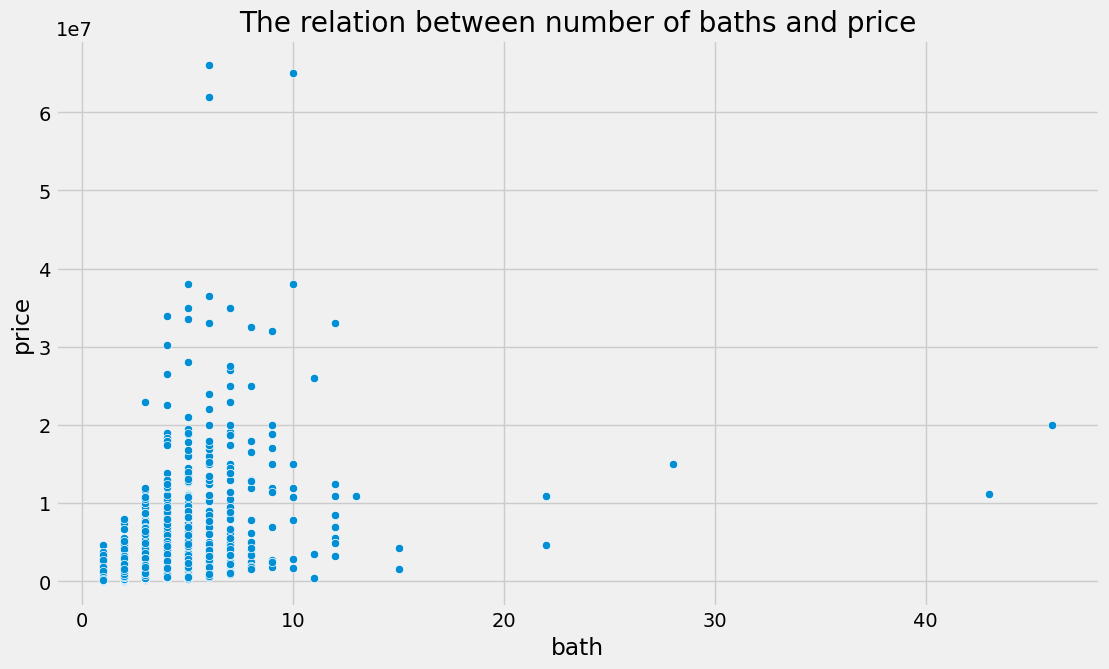

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

In [20]:
data=df 

Text(0.5, 1.0, 'The relation between number of baths and price')

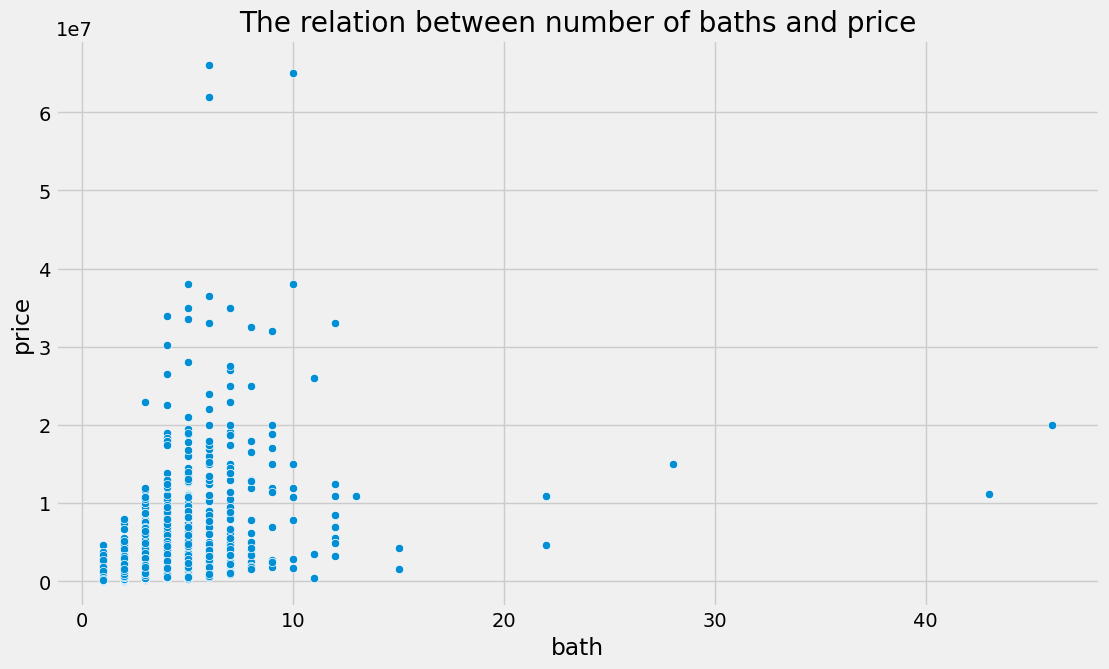

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

In [22]:
df.sort_values(by="bath",ascending=False).head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
143,for_sale,19995000,46.0,46.0,NaN,73 E 3rd St Unit Apt New York City NY 10003,73 E 3rd St Unit Apt,New York City,Connecticut,10003,22071.0,NaT
45825,for_sale,11200000,42.0,43.0,0.83,646662 Port Richmond Ave Staten Island NY 10302,646662 Port Richmond Ave,Staten Island,Connecticut,10302,27152.0,NaT
24689,for_sale,15000000,68.0,28.0,NaN,1721 E 8th St Unit 27UNITS New York City NY 11223,1721 E 8th St Unit 27UNITS,New York City,Connecticut,11223,20700.0,NaT
18295,for_sale,4649000,28.0,22.0,0.15,239241 Main St Unit 10 Staten Island NY 10307,239241 Main St Unit 10,Staten Island,Connecticut,10307,12825.0,NaT
4555,for_sale,10950000,24.0,22.0,0.07,148150 Clinton St New York City NY 11201,148150 Clinton St,New York City,Connecticut,11201,15512.0,NaT


Text(0.5, 1.0, 'The relation between number of baths and price')

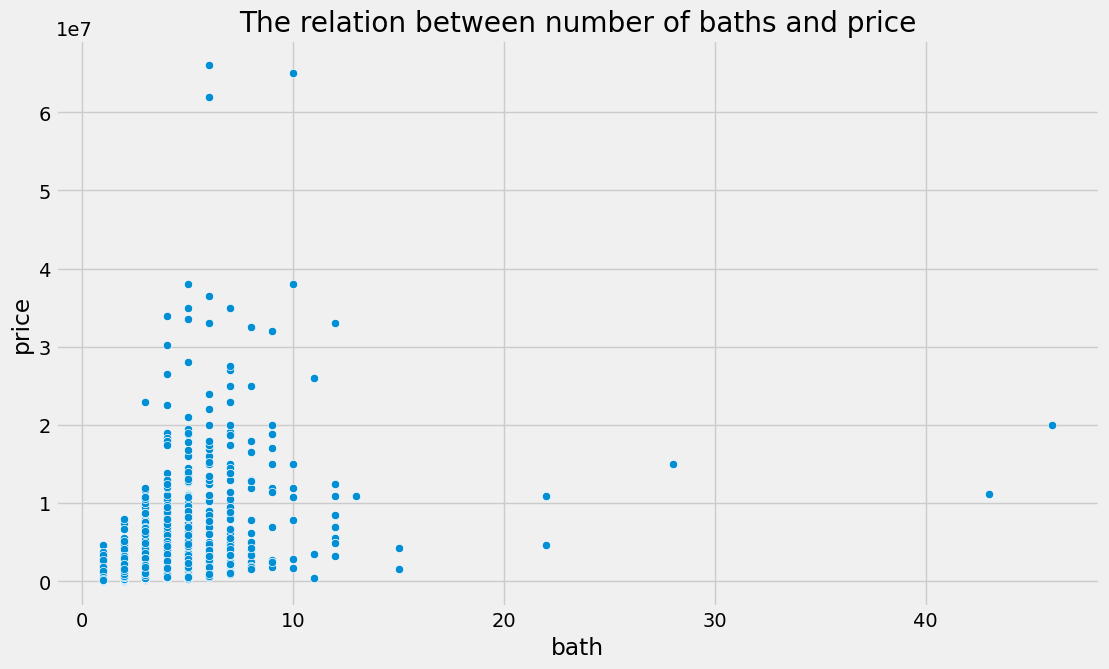

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="bath",y="price")
plt.title("The relation between number of baths and price")

Text(0.5, 1.0, 'The relation between House size and price')

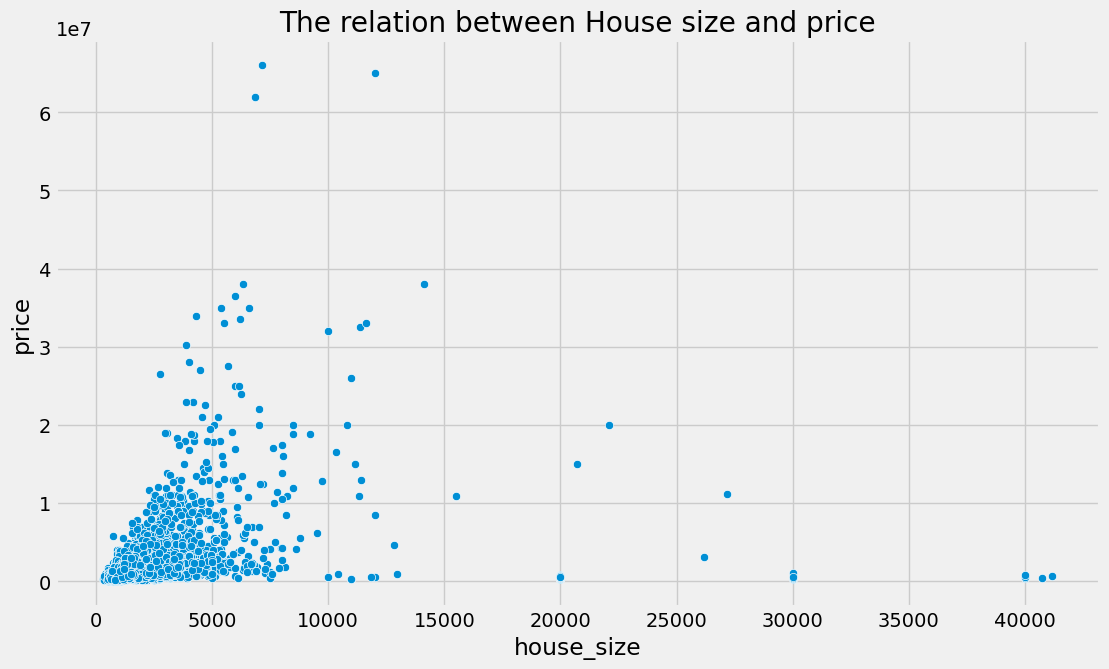

In [24]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=data,x="house_size",y="price")
plt.title("The relation between House size and price")

In [25]:
df.sort_values(by="house_size",ascending=False).head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
13003,for_sale,638500,2.0,2.0,0.95,460 Lafayette Ave Wyckoff NJ 07481,460 Lafayette Ave,Wyckoff,Connecticut,7481,41182.0,NaT
5591,for_sale,389000,1.0,1.0,0.27,720 W 173rd St Apt 5 New York NY 10032,720 W 173rd St Apt 5,New York,Connecticut,10032,40720.0,2017-10-25
5390,for_sale,699900,8.0,4.0,0.09,5 Timothy St Paterson NJ 07503,5 Timothy St,Paterson,Connecticut,7503,39996.0,NaT
26175,for_sale,769000,10.0,4.0,0.14,248 Conklin Ave Hillside NJ 07205,248 Conklin Ave,Hillside,Connecticut,7205,39996.0,NaT
7245,for_sale,649000,8.0,4.0,0.07,290 21st St Irvington NJ 07111,290 21st St,Irvington,Connecticut,7111,39996.0,2018-07-02


Text(0.5, 1.0, 'The relation between House size and price')

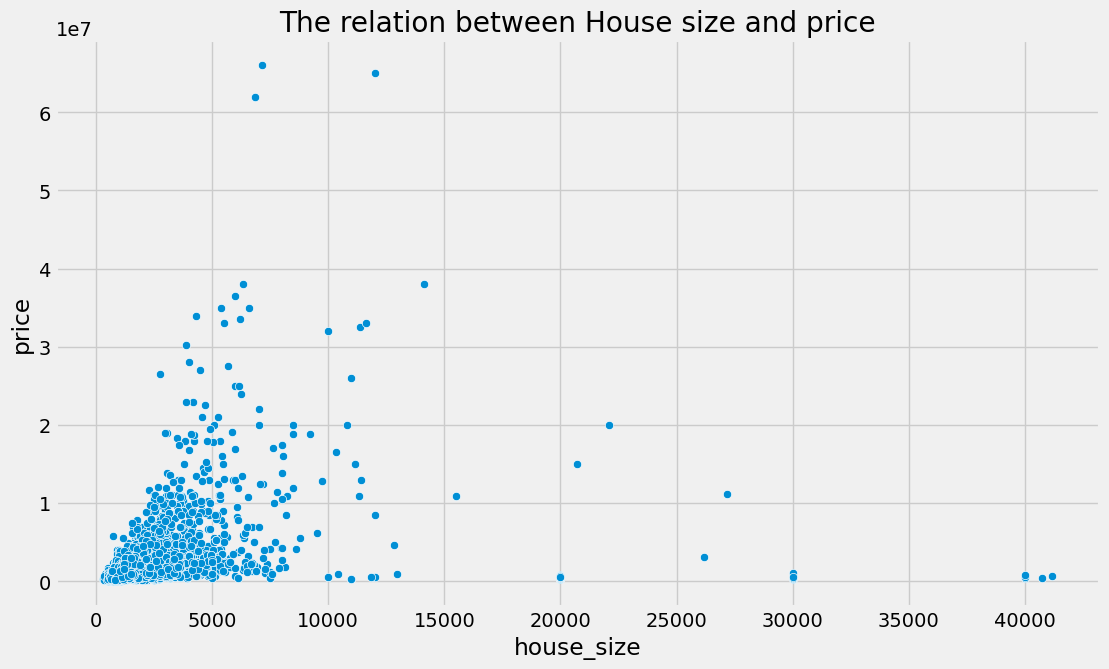

In [26]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=data,x="house_size",y="price")
plt.title("The relation between House size and price")

In [27]:
data.head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,2350000,1.0,1.0,NaN,30 Park Pl Apt 39G New York NY 10007,30 Park Pl Apt 39G,New York,Connecticut,10007,733.0,2018-12-05
1,for_sale,14950000,6.0,10.0,0.05,154 E 71st St New York City NY 10021,154 E 71st St,New York City,Connecticut,10021,11140.0,NaT
2,for_sale,450000,1.0,1.0,NaN,412 Monroe St Apt 8 Hoboken NJ 07030,412 Monroe St Apt 8,Hoboken,Connecticut,7030,700.0,2006-08-21
3,for_sale,10000000,4.0,5.0,NaN,120 E 87th St Unit 22AB New York NY 10128,120 E 87th St Unit 22AB,New York,Connecticut,10128,3554.0,NaT
5,for_sale,6250000,3.0,4.0,NaN,1 W End Ave Apt 27A Manhattan NY 10023,1 W End Ave Apt 27A,Manhattan,Connecticut,10023,2866.0,NaT


In [28]:
new_df=data[["status","price","bed","bath","city","state","house_size"]]

In [29]:
new_df.head()

,status,price,bed,bath,city,state,house_size
0,for_sale,2350000,1.0,1.0,New York,Connecticut,733.0
1,for_sale,14950000,6.0,10.0,New York City,Connecticut,11140.0
2,for_sale,450000,1.0,1.0,Hoboken,Connecticut,700.0
3,for_sale,10000000,4.0,5.0,New York,Connecticut,3554.0
5,for_sale,6250000,3.0,4.0,Manhattan,Connecticut,2866.0


In [30]:
new_df.isnull().sum()

status        0
price         0
bed           0
bath          0
city          0
state         0
house_size    0
dtype: int64

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486 entries, 0 to 45827
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      6486 non-null   object 
 1   price       6486 non-null   int64  
 2   bed         6486 non-null   float64
 3   bath        6486 non-null   float64
 4   city        6486 non-null   object 
 5   state       6486 non-null   object 
 6   house_size  6486 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 405.4+ KB


In [32]:
df_nonull = df.dropna()

In [33]:
init_notebook_mode(connected=True)

In [34]:
df_nonull.sort_values(by="house_size",ascending=False).head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
5591,for_sale,389000,1.0,1.0,0.27,720 W 173rd St Apt 5 New York NY 10032,720 W 173rd St Apt 5,New York,Connecticut,10032,40720.0,2017-10-25
7245,for_sale,649000,8.0,4.0,0.07,290 21st St Irvington NJ 07111,290 21st St,Irvington,Connecticut,7111,39996.0,2018-07-02
9838,for_sale,420000,5.0,4.0,0.06,550 Grove St Irvington NJ 07111,550 Grove St,Irvington,Connecticut,7111,29997.0,2021-01-14
19889,for_sale,500000,8.0,3.0,0.11,94 Lyons Ave Newark NJ 07112,94 Lyons Ave,Newark,Connecticut,7112,29997.0,2014-08-15
2567,for_sale,699000,8.0,3.0,0.07,245 N 11th St Newark NJ 07107,245 N 11th St,Newark,Connecticut,7107,29997.0,2018-06-21


In [35]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(5591)
df = df.drop(5591)

In [36]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(7245)
df = df.drop(7245)

In [37]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(9838)
df = df.drop(9838)

In [38]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(19889)
df = df.drop(19889)

In [39]:
df_nonull.sort_values(by="house_size",ascending=False).head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
2567,for_sale,699000,8.0,3.0,0.07,245 N 11th St Newark NJ 07107,245 N 11th St,Newark,Connecticut,7107,29997.0,2018-06-21
27471,for_sale,599000,7.0,3.0,0.13,29 Hedden Ter Newark NJ 07108,29 Hedden Ter,Newark,Connecticut,7108,29997.0,2018-12-06
1023,for_sale,3095000,4.0,4.0,0.05,35 Clifton Pl New York City NY 11238,35 Clifton Pl,New York City,Connecticut,11238,26160.0,2014-09-24
4041,for_sale,725000,7.0,4.0,0.28,136 River Dr Garfield NJ 07026,136 River Dr,Garfield,Connecticut,7026,19998.0,1998-04-02
22349,for_sale,479000,5.0,3.0,0.09,188 Goldsmith Ave Newark NJ 07112,188 Goldsmith Ave,Newark,Connecticut,7112,19998.0,2018-11-29


price
72000       1
79000       1
80000       1
86000       1
89500       1
           ..
36500000    1
38000000    2
62000000    2
65000000    1
66000000    1
Length: 1526, dtype: int64

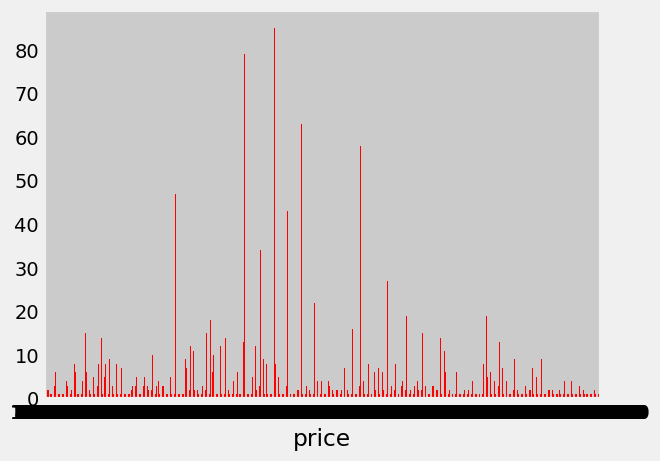

In [40]:
num_types = df.groupby(by='price').size();
display(num_types);
num_types.plot.bar(color=['red'],rot=0);


In [41]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(2567)
df = df.drop(2567)

In [42]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(27471)
df = df.drop(27471)

In [43]:
df_nonull = df_nonull.sort_values(by='house_size', ascending=False)
df_nonull = df_nonull.drop(4041)
df = df.drop(4041)

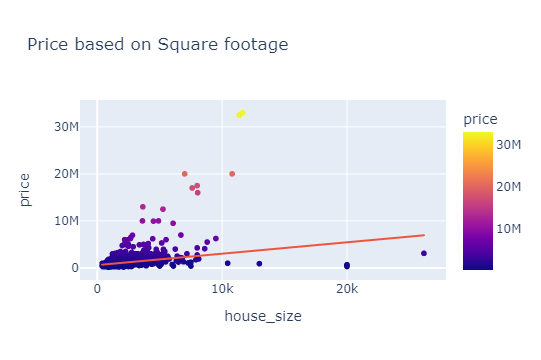

In [44]:
fig = px.scatter(df_nonull, x="house_size", y="price", trendline="ols", color = "price", title='Price based on Square footage')
fig.show()

In [45]:
df=df.drop(['status','full_address','street','city','state','sold_date', 'bed', 'bath','acre_lot', 'zip_code'],axis=1)

X = df.drop(columns=['price']) #independent variables
y = df[['price']].copy() #dependent variables

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

from IPython.display import display_html 
X_train_styler = X_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Independents variables')
y_train_styler = y_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Dependents variables')
space = "\xa0" * 10 #space between columns
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)


,house_size
45357,3366.000000
1080,729.000000
10396,1036.000000
2520,6850.000000
6173,670.000000
,price
45357,1049999
1080,905000
10396,1375000
2520,62000000


In [47]:
df.shape

(6479, 2)

In [48]:
svm_model = svm.SVC(gamma='scale', C=1) #Creates a svm model object. Mote, 'scale' and 1.0 are gamma and C's respective defaults 
svm_model.fit(X_train,y_train) 

C:\Users\drchr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1)

In [49]:
y_train_array, y_test_array = y_train['price'].values, y_test['price'].values
y_train_array

X_train_array, X_test_array = X_train.values, X_test.values
X_train_array

svm_model.fit(X_train_array,y_train_array) 


SVC(C=1)

In [50]:
predictions = svm_model.predict(X_train_array)
np.set_printoptions(threshold=15) #truncates the print output
print(predictions)

[ 899000  599000  599000 ...  599000  599000 2500000]


In [51]:
score = metrics.accuracy_score(y_train_array, predictions)
score

0.021291367738949317

In [52]:
print(svm_model.predict([[1000]]))


[599000]


In [53]:
#The sliders where the user can input values. Min and max are set by using the complete datasets' 
hs_widget = widgets.FloatSlider(description='House Size:',min=0, max=27000)

#A button for the user to get predictions using input valus. 
button_predict = widgets.Button( description='Predict Price' )
button_ouput = widgets.Label(value='Enter approximate house size and press the \"Predict\" button.' )

#Defines what happens when you click the button 
def on_click_predict(b):
    prediciton = svm_model.predict([[
        hs_widget.value]])
    button_ouput.value='Prediction(in USD) = ' + str(prediciton[0])
button_predict.on_click(on_click_predict)

#Displays the text boxes and button inside a VBox 
vb=widgets.VBox([hs_widget, button_predict,button_ouput])
print('\033[1m' + 'Enter approximate house size (in square footage) and make a prediction:' + '\033[0m')
display(vb)


Enter approximate house size (in square footage) and make a prediction:
